In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
# First look at the table.
customers = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
customers.shape

(10127, 23)

In [5]:
customers.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# remove some columns which look like unnessary
customers.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)

In [7]:
customers.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
# null values check
customers.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# duplicates
customers.duplicated().sum()

0

In [11]:
# check statistical variables
round(customers.describe(),3)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,7.391776e+08,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,3.690378e+07,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,7.080821e+08,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,7.130368e+08,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,7.179264e+08,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,7.731435e+08,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,8.283431e+08,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [12]:
customers.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Text(0.5, 1.0, 'Number of existing customers vs. churn customers')

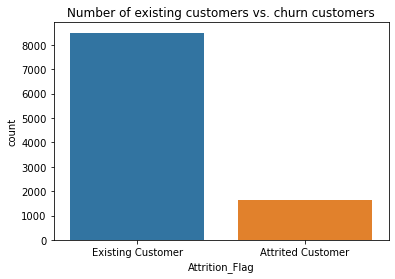

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Attrition_Flag', data = customers)
plt.title('Number of existing customers vs. churn customers')

In [14]:
customers['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [15]:
#'Attrition_Flag'
churn_count = customers['Attrition_Flag'].value_counts().reset_index()
churn_count.columns = ['Customer status','Count']
churn_count['Percentage'] = churn_count['Count'].apply(lambda x: round(x/churn_count['Count'].sum()*100),0)
churn_count

,Customer status,Count,Percentage
0,Existing Customer,8500,84
1,Attrited Customer,1627,16


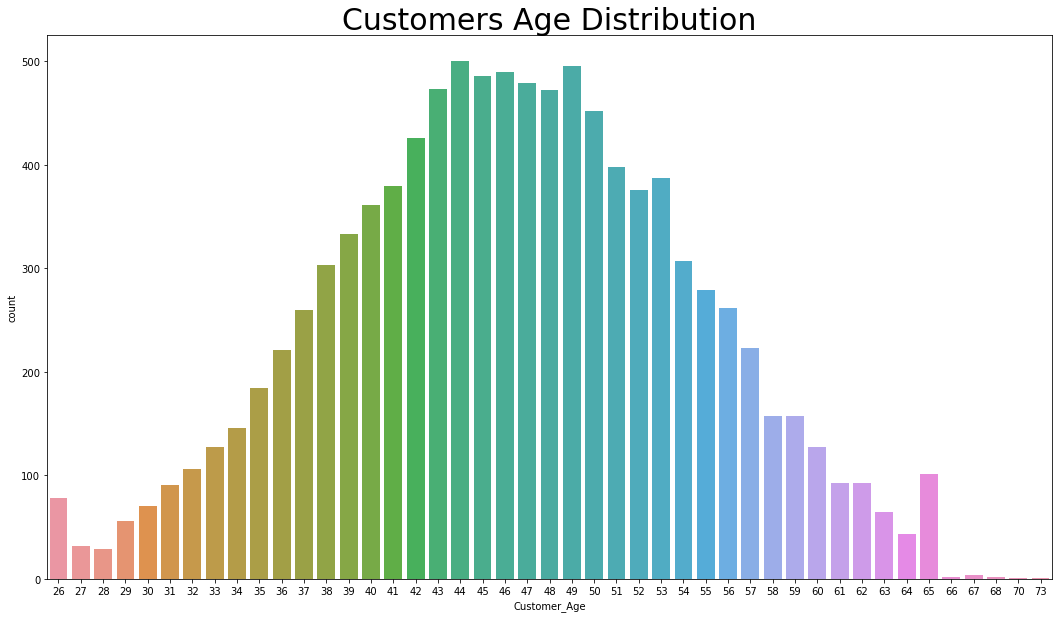

In [16]:
plt.figure(figsize = (18,10))
plt.title("Customers Age Distribution", fontsize = 30)
sns.countplot(data = customers, x = customers["Customer_Age"])

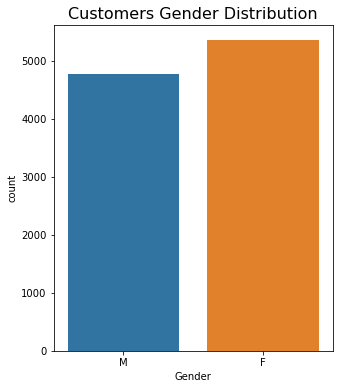

In [17]:
plt.figure(figsize = (5,6))
plt.title("Customers Gender Distribution", fontsize = 16)
sns.countplot(data = customers, x = customers["Gender"])

In [18]:
col_list = customers.columns
col_list

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

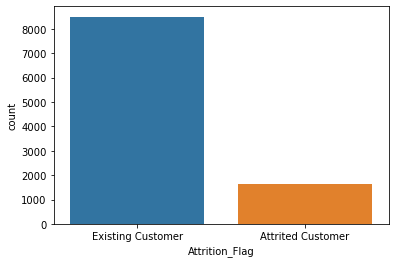

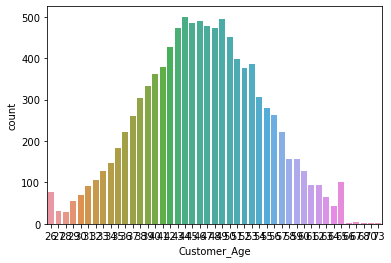

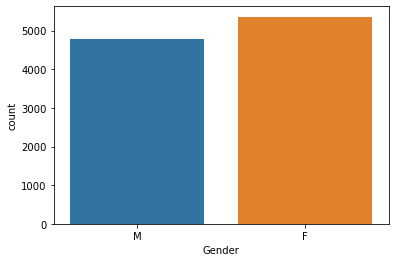

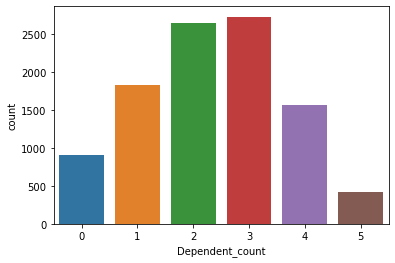

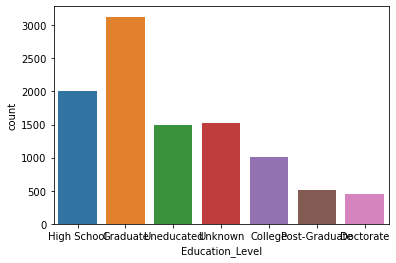

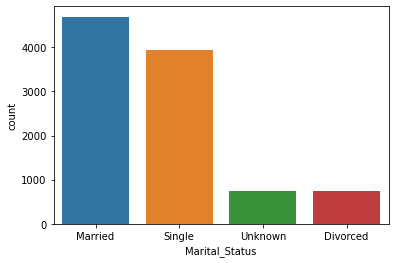

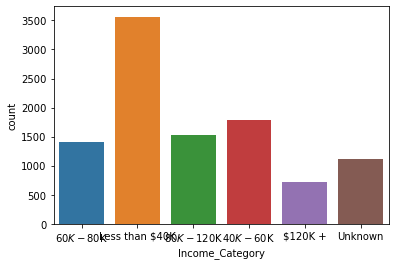

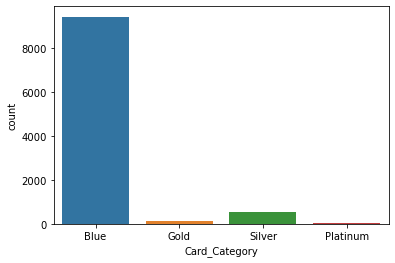

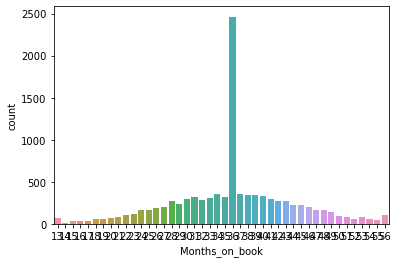

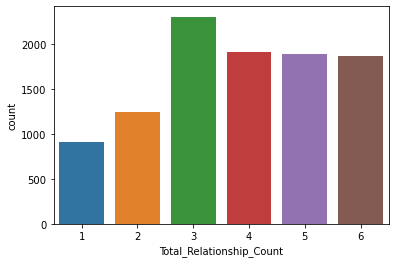

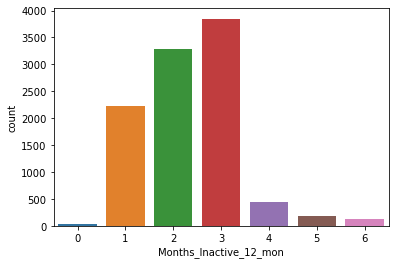

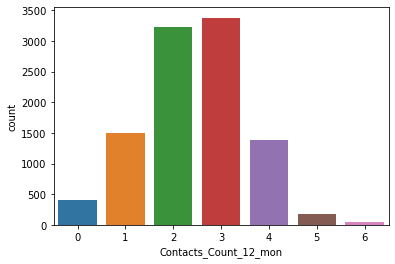

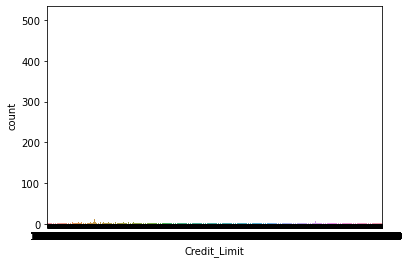

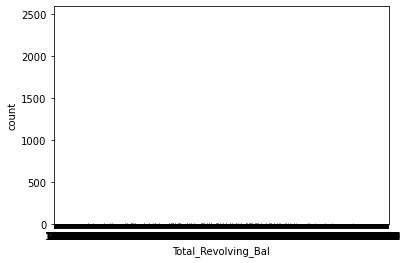

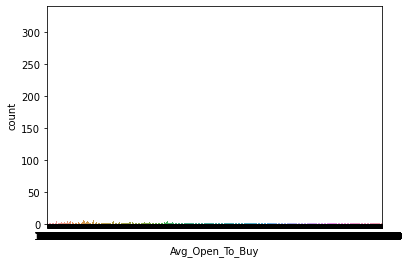

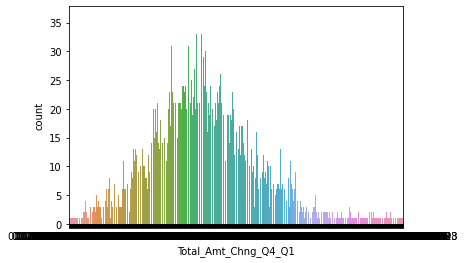

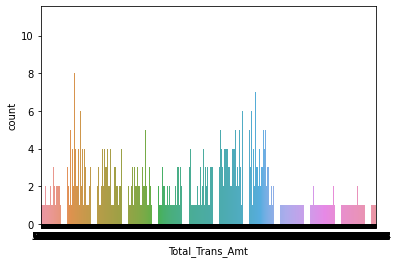

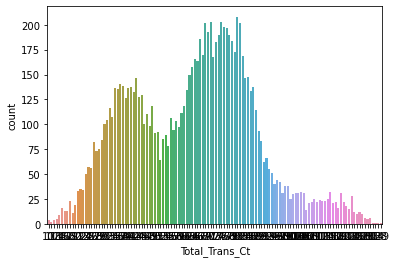

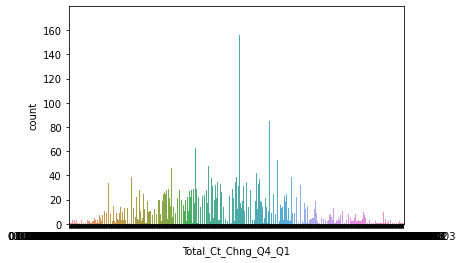

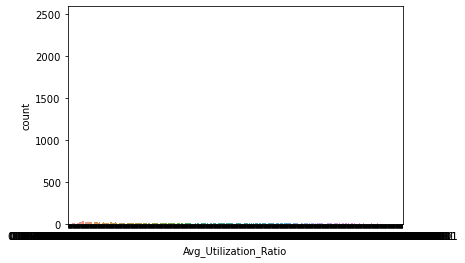

In [19]:
for i in range(1,len(col_list)):
    sns.countplot(data = customers, x = customers[col_list[i]])
    plt.show()

In [20]:
df1 = customers[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
df1.tail(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [21]:
for feature in df1.columns:
    if df1[feature].dtype =='object':
        df1[feature] = pd.Categorical(df1[feature]).codes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df1.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


Text(0.5, 1.0, 'Outlier in data')

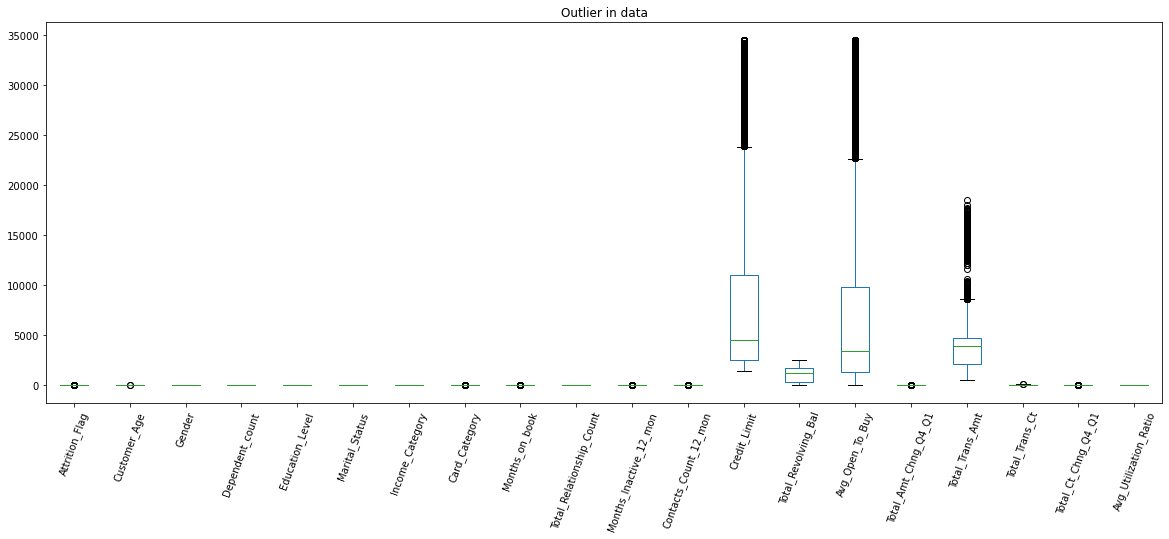

In [23]:
df1.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data')

In [24]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']

In [25]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [26]:
for i in df1[outlier_list]:
    df1[i]=treat_outlier(df1[i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Outlier in data')

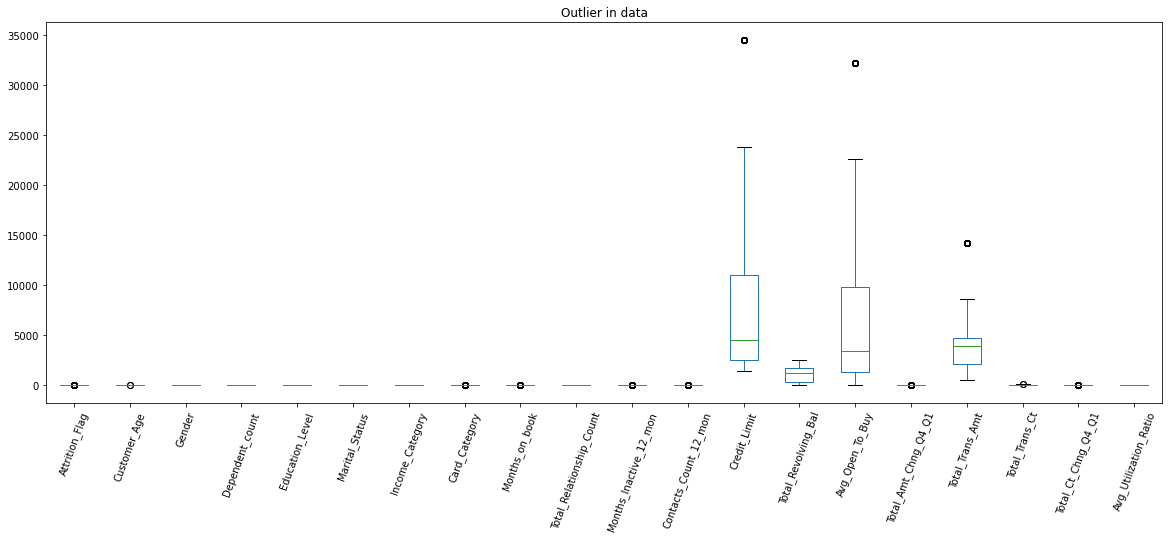

In [27]:
df1.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data')

In [28]:
# premodeling
X = df1[['Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

y = df1.pop('Attrition_Flag')

In [29]:
# spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.30,random_state=0)

In [30]:
X_train, X_test, train_labels, test_labels

(      Gender  Dependent_count  Education_Level  Marital_Status  \
 4813       1                2                2               0   
 9887       1                1                6               2   
 4191       0                4                5               1   
 7527       0                3                2               1   
 5081       1                4                0               0   
 ...      ...              ...              ...             ...   
 9225       1                0                6               2   
 4859       1                2                5               2   
 3264       1                1                6               2   
 9845       1                3                0               1   
 2732       0                1                6               1   
 
       Income_Category  Card_Category  Months_on_book  \
 4813                3              0              40   
 9887                2              0              48   
 4191                4 

In [31]:
# ML classifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# ML classifier model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Data imputation
from imblearn.over_sampling import SMOTE 

from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# work with umbalance data
from imblearn.over_sampling import SMOTE 

OS_SMOTE = SMOTE()

X_train, train_labels = OS_SMOTE.fit_resample(X_train,train_labels)

In [33]:
X_train, train_labels

(       Gender  Dependent_count  Education_Level  Marital_Status  \
 0           1                2                2               0   
 1           1                1                6               2   
 2           0                4                5               1   
 3           0                3                2               1   
 4           1                4                0               0   
 ...       ...              ...              ...             ...   
 11829       0                3                6               1   
 11830       0                1                4               1   
 11831       0                0                1               1   
 11832       0                3                2               2   
 11833       0                3                2               1   
 
        Income_Category  Card_Category  Months_on_book  \
 0                    3              0              40   
 1                    2              0              48   
 2      

   Labels  Attrition_Flag
0       1            5917
1       0            5917


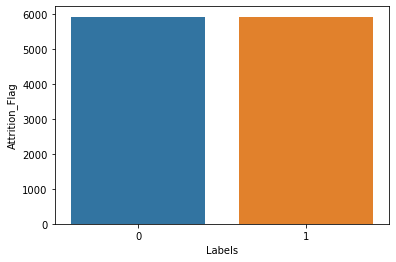

In [34]:
after_smote = train_labels.value_counts().reset_index()
after_smote.columns = ['Labels','Attrition_Flag']
print(after_smote)
sns.barplot(x='Labels',y='Attrition_Flag',data=after_smote);

In [35]:
RF_pipe = Pipeline(steps =[ ('std_scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=0)) ])
RF_pipe.fit(X_train,train_labels)

Pipeline(steps=[('std_scale', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=0))])

In [36]:
DT_pipe = Pipeline(steps =[ ('_std_scale',StandardScaler()), ("DT",DecisionTreeClassifier(criterion='gini',max_features=5, max_depth=7, min_samples_leaf=15, min_samples_split=30,random_state=0)) ])
DT_pipe.fit(X_train,train_labels)

Pipeline(steps=[('_std_scale', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(max_depth=7, max_features=5,
                                        min_samples_leaf=15,
                                        min_samples_split=30,
                                        random_state=0))])

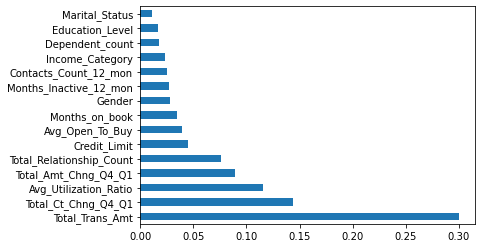

In [37]:
# feature_importances

feature_importances = pd.Series(RF_pipe.steps[1][1].feature_importances_, index=X_train.columns);
feature_importances.nlargest(15).plot(kind='barh')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
#Scaling Numeric Values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
#-----Upsampling----
from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_upsampled, y_train_upsampled = oversample.fit_resample(X_train,y_train)

print("After Upsampling:-")
print(Counter(y_train_upsampled))


Before Upsampling:-
Counter({1: 5699, 0: 1086})
After Upsampling:-
Counter({1: 5699, 0: 5699})


In [47]:
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train_upsampled, y_train_upsampled)

# Predicting result for training set and validation set
predict_val_rf = classifier.predict(X_test)

# Model Performance
print("Accuracy : ", accuracy_score(y_test, predict_val_rf) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf) *  100)
print(confusion_matrix(y_test, predict_val_rf))
print(classification_report(y_test, predict_val_rf))

Accuracy :  92.78874925194495
Recall :  95.6087111745805
Precision :  95.77968526466381
[[ 423  118]
 [ 123 2678]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       541
           1       0.96      0.96      0.96      2801

    accuracy                           0.93      3342
   macro avg       0.87      0.87      0.87      3342
weighted avg       0.93      0.93      0.93      3342



In [48]:
model = XGBClassifier()
model.fit(X_train_upsampled, y_train_upsampled)

# Predicting result for training set and validation set
predict_val_rf2 = model.predict(X_test)

# Model Performance
print("Accuracy : ", accuracy_score(y_test, predict_val_rf2) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf2) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf2) *  100)
print(confusion_matrix(y_test, predict_val_rf2))
print(classification_report(y_test, predict_val_rf2))

Accuracy :  95.33213644524237
Recall :  97.57229560871117
Precision :  96.88053881602269
[[ 453   88]
 [  68 2733]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       541
           1       0.97      0.98      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.92      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342



In [50]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train_upsampled, y_train_upsampled)

# Predicting result for training set and validation set
predict_val_rf2 = gaussian.predict(X_test)

# Model Performance
print("Accuracy : ", accuracy_score(y_test, predict_val_rf2) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf2) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf2) *  100)
print(confusion_matrix(y_test, predict_val_rf2))
print(classification_report(y_test, predict_val_rf2))

Accuracy :  70.97546379413525
Recall :  71.33166726169226
Precision :  92.2863741339492
[[ 374  167]
 [ 803 1998]]
              precision    recall  f1-score   support

           0       0.32      0.69      0.44       541
           1       0.92      0.71      0.80      2801

    accuracy                           0.71      3342
   macro avg       0.62      0.70      0.62      3342
weighted avg       0.82      0.71      0.74      3342



In [51]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_upsampled, y_train_upsampled)

# Predicting result for training set and validation set
predict_val_rf2 = svc.predict(X_test)

# Model Performance
print("Accuracy : ", accuracy_score(y_test, predict_val_rf2) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf2) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf2) *  100)
print(confusion_matrix(y_test, predict_val_rf2))
print(classification_report(y_test, predict_val_rf2))

Accuracy :  86.9539198084979
Recall :  89.25383791503035
Precision :  94.87666034155598
[[ 406  135]
 [ 301 2500]]
              precision    recall  f1-score   support

           0       0.57      0.75      0.65       541
           1       0.95      0.89      0.92      2801

    accuracy                           0.87      3342
   macro avg       0.76      0.82      0.79      3342
weighted avg       0.89      0.87      0.88      3342

